<img src='./img/header_placeholder.png' alt='Logo EU Copernicus ECMWF' align='right' width='100%'></img>

<br>

# 2021 Western North America heat wave

#### Load libraries

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.colors

<br>

### Open monthly aggregates from 1981 to 2010

In [4]:
file = xr.open_dataset('./data/era5_monthly/era5_monthly_1981-2010.nc')
file

<xarray.Dataset>
Dimensions:    (latitude: 361, longitude: 441, time: 360)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... -70.5 -70.25 -70.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2010-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-04 09:21:48 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

### Retrieve the t2m variable

In [5]:
t2m_monthly = file.t2m
t2m_monthly

<xarray.DataArray 't2m' (time: 360, latitude: 361, longitude: 441)>
[57312360 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... -70.5 -70.25 -70.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2010-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

### Visualize one time step of 2m air temperature

In [9]:
time_step = 200
date = str(t2m_monthly[time_step,:,:].time.dt.strftime('%b %Y').data)

Text(0.5, 1.0, '2 metre temperature - Sep 1997 \n')

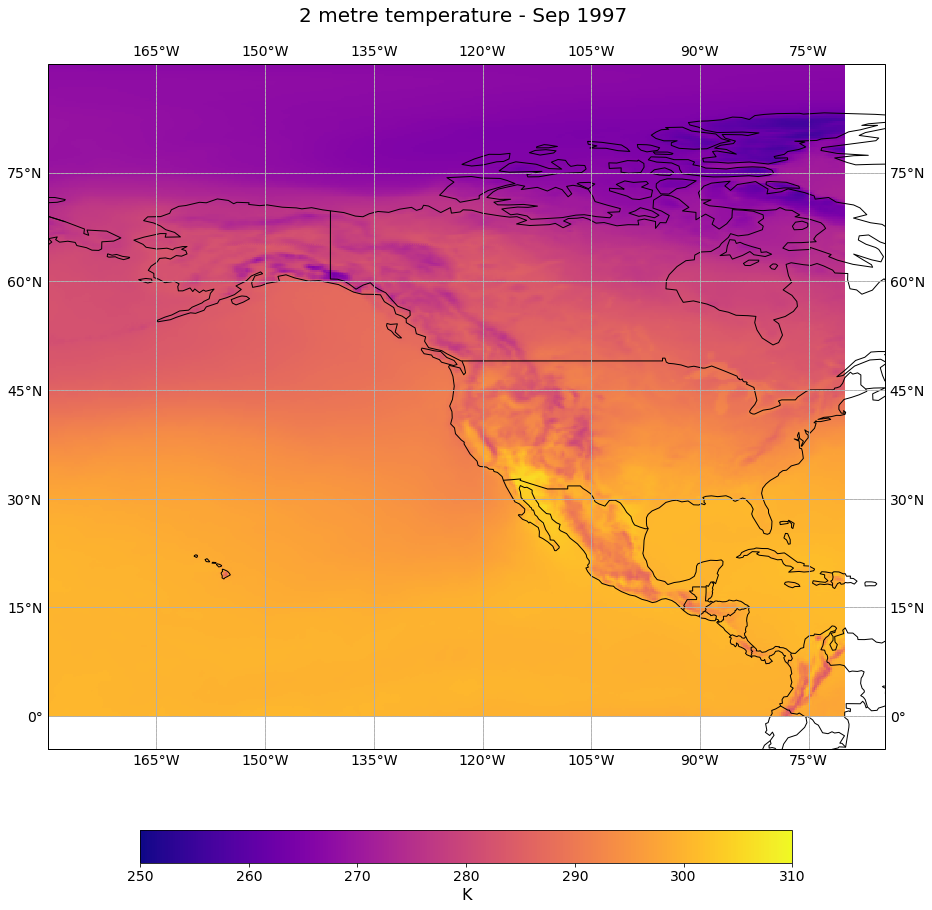

In [10]:
fig=plt.figure(figsize=(15, 15))

ax = plt.axes(projection=ccrs.PlateCarree())
   
img = ax.pcolormesh(t2m_monthly.longitude, t2m_monthly.latitude, t2m_monthly[time_step,:,:], 
                        cmap=plt.get_cmap('plasma'), transform=ccrs.PlateCarree(),
                        vmin=250,
                        vmax=310,
                        shading='auto')

ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

#ax.set_extent([lonmin, lonmax, latmin, latmax], projection)
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

ax.gridlines()

cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(t2m_monthly.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax.set_title(t2m_monthly.long_name+ ' - ' + date + ' \n', fontsize=20, pad=20.0)

### Create the long-term average for each month

In [11]:
climatology = t2m_monthly.groupby("time.month").mean("time")
climatology

<xarray.DataArray 't2m' (month: 12, latitude: 361, longitude: 441)>
array([[[247.60783, 247.60783, ..., 247.60783, 247.60783],
        [247.42589, 247.42531, ..., 247.60678, 247.60739],
        ...,
        [300.02707, 300.02087, ..., 298.28067, 298.34412],
        [300.04236, 300.04156, ..., 298.36774, 298.39554]],

       [[246.99078, 246.99078, ..., 246.99078, 246.99078],
        [246.80537, 246.80513, ..., 247.01949, 247.01999],
        ...,
        [299.82715, 299.82016, ..., 298.1863 , 298.2433 ],
        [299.84045, 299.8394 , ..., 298.27032, 298.28973]],

       ...,

       [[251.6446 , 251.6446 , ..., 251.6446 , 251.6446 ],
        [251.54857, 251.54799, ..., 251.49051, 251.49083],
        ...,
        [300.28738, 300.27658, ..., 298.15875, 298.25702],
        [300.28958, 300.28265, ..., 298.2477 , 298.305  ]],

       [[249.07149, 249.07149, ..., 249.07149, 249.07149],
        [248.95312, 248.9526 , ..., 249.02992, 249.0301 ],
        ...,
        [300.1911 , 300.17987, ...,

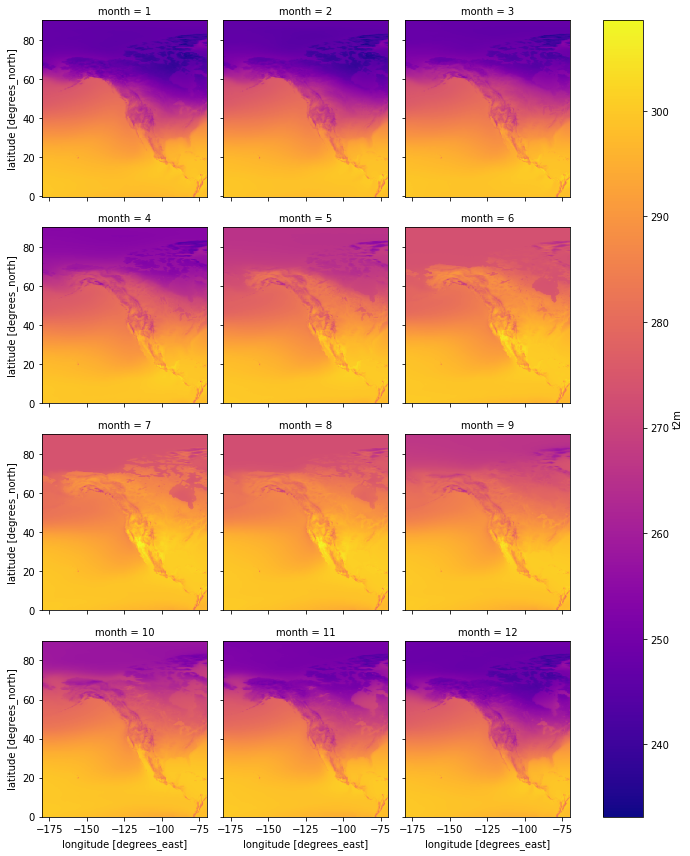

In [18]:
test = climatology.plot(x="longitude", 
                        y="latitude", 
                        col="month", 
                        col_wrap=3,
                        cmap=plt.get_cmap('plasma'))

<br>

### Load monthly aggregates for June 2021

In [20]:
file_monthly_2021 = xr.open_dataset('./data/era5_monthly/era5_2m_temperature_2021.nc')
file_monthly_2021

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 361, longitude: 441, time: 7)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... -70.5 -70.25 -70.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-07-01
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-04 14:49:05 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [32]:
t2m_0621 = file_monthly_2021.t2m[5,1,:,:]
t2m_0621

<xarray.DataArray 't2m' (latitude: 361, longitude: 441)>
[159201 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... -70.5 -70.25 -70.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
    expver     int32 5
    time       datetime64[ns] 2021-06-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [35]:
date = str(t2m_0621.time.dt.strftime('%b %Y').data)
date

'Jun 2021'

Text(0.5, 1.0, '2 metre temperature - Jun 2021 \n')

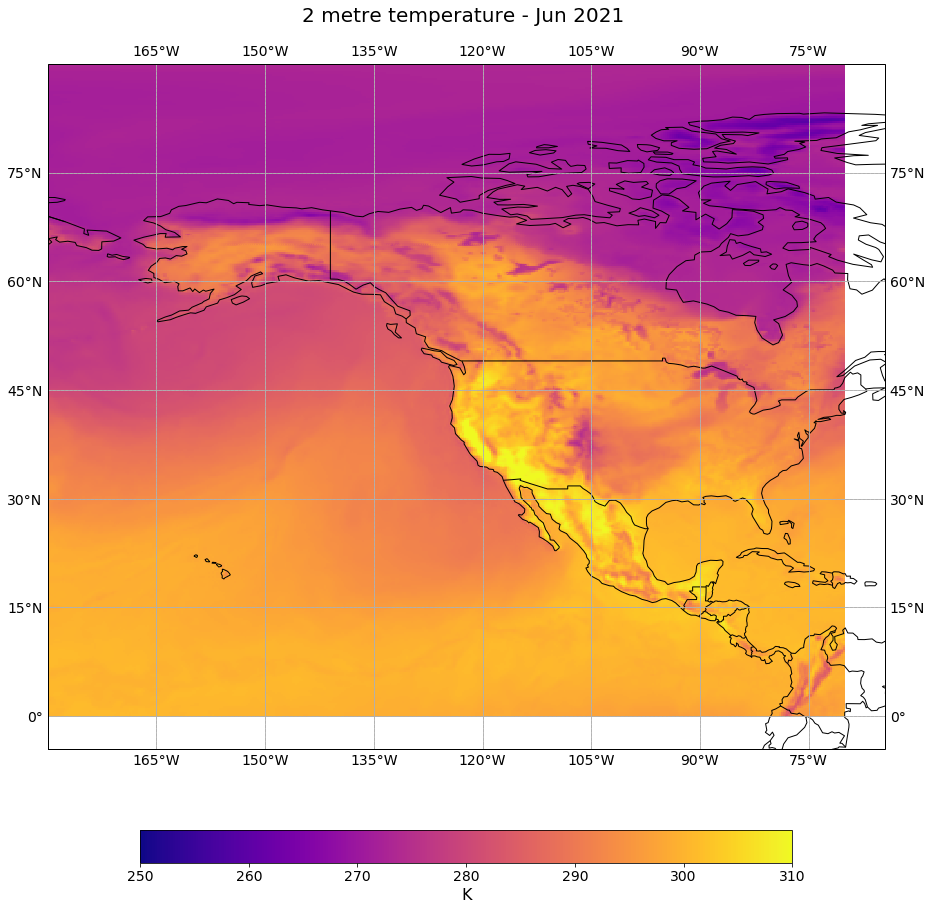

In [36]:
fig=plt.figure(figsize=(15, 15))

ax = plt.axes(projection=ccrs.PlateCarree())
   
img = ax.pcolormesh(t2m_0621.longitude, t2m_0621.latitude, t2m_0621, 
                        cmap=plt.get_cmap('plasma'), transform=ccrs.PlateCarree(),
                        vmin=250,
                        vmax=310,
                        shading='auto')

ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

#ax.set_extent([lonmin, lonmax, latmin, latmax], projection)
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

ax.gridlines()

cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(t2m_0621.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax.set_title(t2m_0621.long_name+ ' - ' + date + ' \n', fontsize=20, pad=20.0)

<br>

### Load ERA5 hourly dataset

In [19]:
file_hourly = xr.open_dataset('./data/era5_hourly/era5_t2m_0627-29.nc')
file_hourly

<xarray.Dataset>
Dimensions:    (latitude: 361, longitude: 441, time: 72)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... -70.5 -70.25 -70.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2021-06-27 ... 2021-06-29T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-04 14:51:51 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

Create 

<hr>

<p><img src='./img/copernicus_logo.png' align='right' alt='Logo EU Copernicus' width='20%'></img></p>
<br><br><br><br>
<span style='float:right'><p style=\"text-align:right;\">This project is licensed under <a href="./LICENSE">APACHE License 2.0</a>. | <a href=\"https://github.com/ecmwf-projects/copernicus-training">View on GitHub</a></span>